<a href="https://colab.research.google.com/github/safeai-snu/Econometrics/blob/main/Part.2/5.SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 예제 5-1. ARIMA 예시

### 노르웨이 연간 수출 데이터 ARIMA 모델 적합

#### 필요한 패키지 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

#### 데이터 불러오기

In [2]:
global_economy = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.2/data/global_economy.csv')
global_economy['Year'] = pd.to_datetime(global_economy['Year'], format='%Y')
nor_exports = global_economy[global_economy['Code'] == 'NOR']
nor_exports.index = nor_exports['Year']
nor_exports

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
Year,,,,,,,,,
1960-01-01,Norway,NOR,1960-01-01,5.163272e+09,NaN,9.027832,37.348662,36.257078,3581239.0
1961-01-01,Norway,NOR,1961-01-01,5.632461e+09,6.273336,9.222397,37.132253,34.950894,3609800.0
1962-01-01,Norway,NOR,1962-01-01,6.066977e+09,2.813945,9.708811,35.512134,33.772295,3638918.0
1963-01-01,Norway,NOR,1963-01-01,6.510240e+09,3.785043,9.948775,35.910443,34.466143,3666537.0
1964-01-01,Norway,NOR,1964-01-01,7.159203e+09,5.009651,10.532471,35.667900,36.021506,3694339.0
1965-01-01,Norway,NOR,1965-01-01,8.058681e+09,5.285609,10.973489,36.018787,35.718874,3723168.0
1966-01-01,Norway,NOR,1966-01-01,8.696460e+09,3.786513,11.330189,36.649722,35.811150,3753012.0
1967-01-01,Norway,NOR,1967-01-01,9.514497e+09,6.256079,11.849029,37.907565,36.793785,3784539.0
1968-01-01,Norway,NOR,1968-01-01,1.015993e+10,2.259876,12.257618,35.615328,37.861158,3816486.0


#### GDP 대비 수출량 시각화

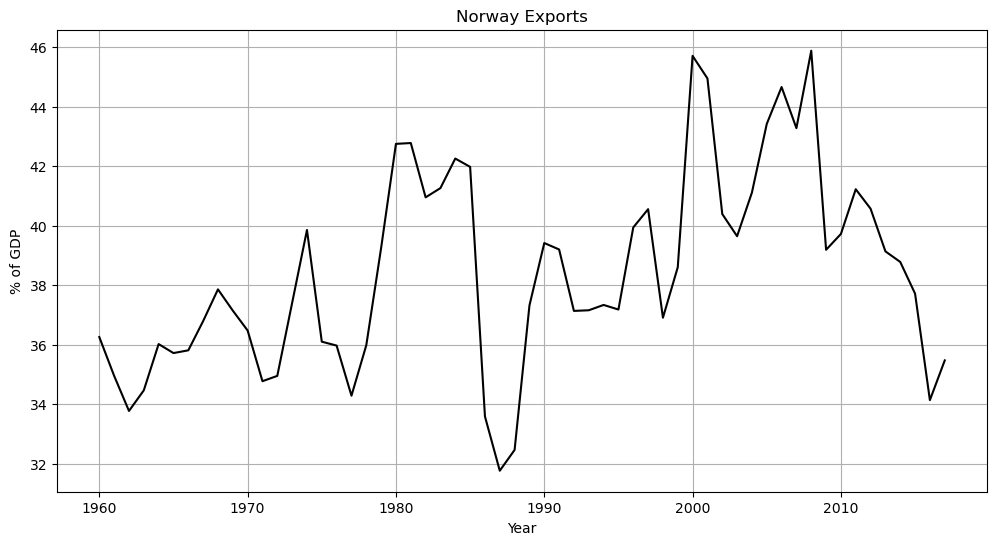

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(nor_exports['Exports'], color='black')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Norway Exports')
plt.grid(True)
plt.show()

#### ACF 시각화

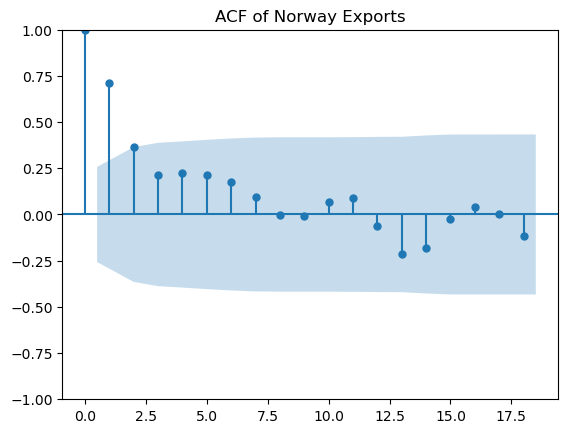

In [4]:
plot_acf(nor_exports['Exports'])
plt.title('ACF of Norway Exports')
plt.show()

#### PACF 시각화

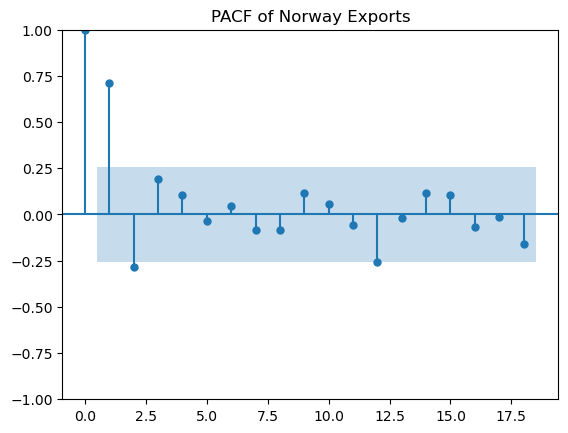

In [5]:
plot_pacf(nor_exports['Exports'])
plt.title('PACF of Norway Exports')
plt.show()

#### ARIMA 모델 적합

In [6]:
model = ARIMA(nor_exports['Exports'], order=(2,0,1))
fit = model.fit()
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Exports   No. Observations:                   58
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -128.685
Date:                Mon, 17 Feb 2025   AIC                            267.370
Time:                        17:23:21   BIC                            277.672
Sample:                    01-01-1960   HQIC                           271.383
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.3681      0.958     40.032      0.000      36.490      40.247
ar.L1          0.6493      0.559      1.161      0.246      -0.447       1.746
ar.L2         -0.0967      0.413     -0.234      0.8

#### 잔차 ACF 시각화

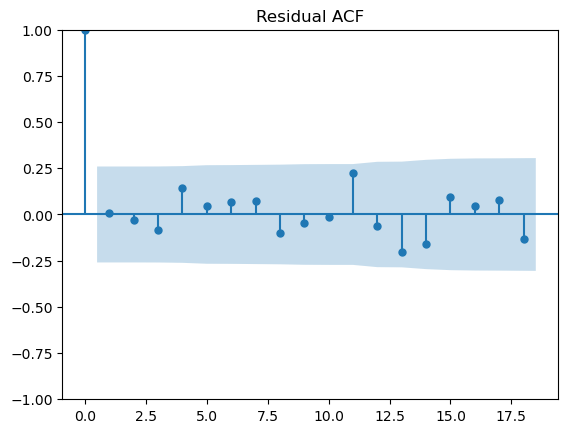

In [7]:
plot_acf(fit.resid[1:])
plt.title('Residual ACF')
plt.show()

#### 잔차 PACF 시각화

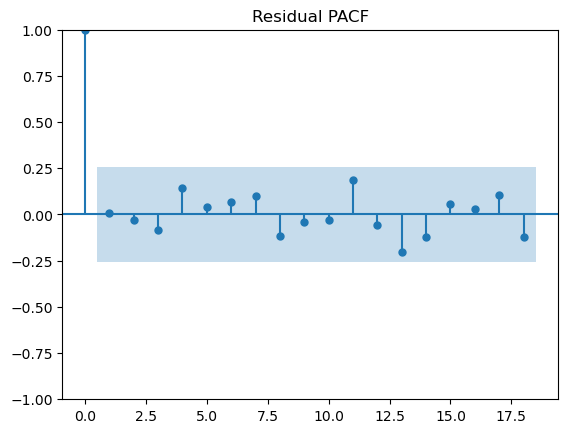

In [8]:
plot_pacf(fit.resid[1:])
plt.title('Residual PACF')
plt.show()

#### 잔차 히스토그램 시각화

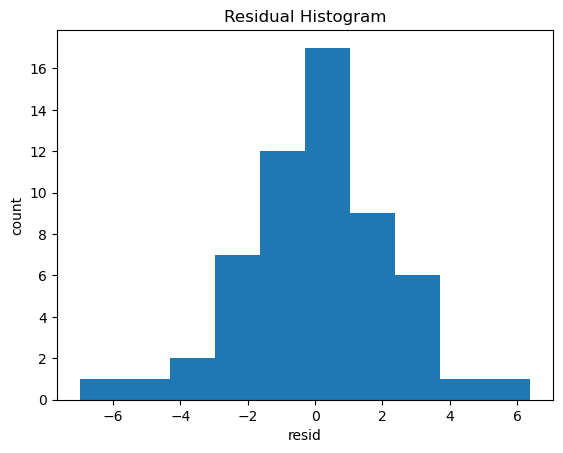

In [9]:
plt.hist(fit.resid[1:])
plt.xlabel("resid")
plt.ylabel("count")
plt.title("Residual Histogram")
plt.show()

## 예제 5-2. 모델 선택 예시

### 캐나다 연간 수출량 데이터 ARIMA 모델 적합

#### 필요한 패키지 설치 및 불러오기

In [10]:
#!pip install pmdarima
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

#### 데이터 불러오기

In [11]:
global_economy = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.2/data/global_economy.csv')
global_economy['Year'] = pd.to_datetime(global_economy['Year'], format='%Y')
can_exports = global_economy[global_economy['Code'] == 'CAN']
can_exports.index = can_exports['Year']
can_exports

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
Year,,,,,,,,,
1960-01-01,Canada,CAN,1960-01-01,4.109345e+10,NaN,13.344305,18.135559,16.966056,17909009.0
1961-01-01,Canada,CAN,1961-01-01,4.076797e+10,3.163292,13.480252,18.051767,17.752915,18271000.0
1962-01-01,Canada,CAN,1962-01-01,4.197885e+10,7.116779,13.623354,17.792899,17.782563,18614000.0
1963-01-01,Canada,CAN,1963-01-01,4.465717e+10,5.181776,13.845163,17.449460,18.253086,18964000.0
1964-01-01,Canada,CAN,1964-01-01,4.888294e+10,6.699457,14.109903,18.154517,19.187625,19325000.0
1965-01-01,Canada,CAN,1965-01-01,5.390957e+10,6.636545,14.439038,18.653121,18.536108,19678000.0
1966-01-01,Canada,CAN,1966-01-01,6.035863e+10,6.584965,14.989983,19.306308,19.337065,20048000.0
1967-01-01,Canada,CAN,1967-01-01,6.476883e+10,2.915310,15.526617,19.252387,20.268609,20412000.0
1968-01-01,Canada,CAN,1968-01-01,7.075903e+10,5.295342,16.156268,19.982665,21.197233,20744000.0


#### 시각화

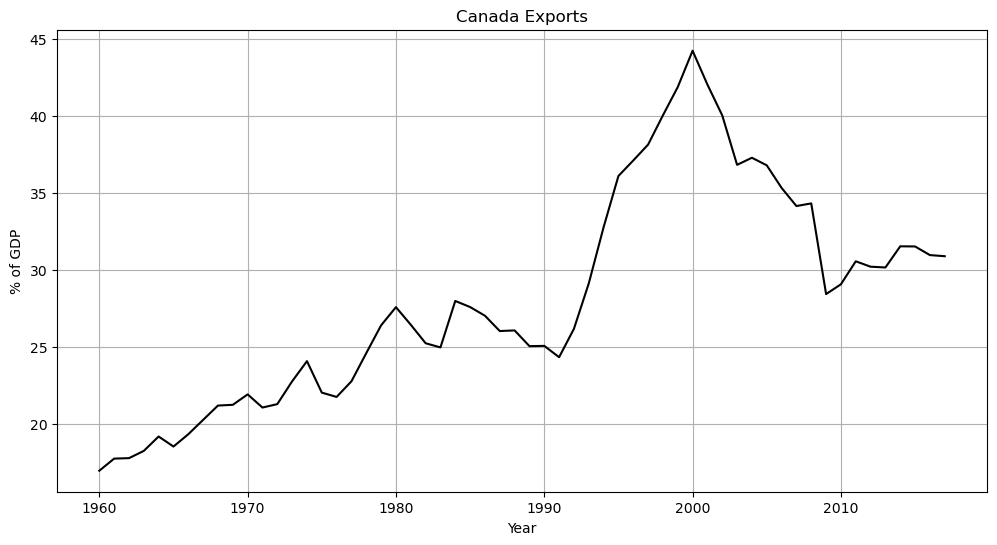

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(can_exports['Exports'], color='black')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Canada Exports')
plt.grid(True)
plt.show()

#### 차분 시각화

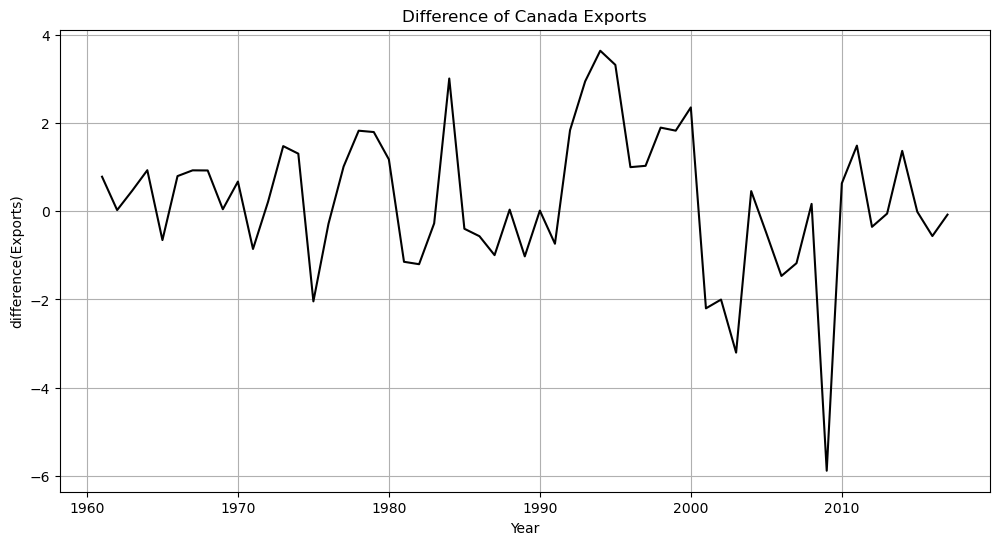

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(can_exports['Exports'].diff()[1:], color='black')
plt.xlabel('Year')
plt.ylabel('difference(Exports)')
plt.title('Difference of Canada Exports')
plt.grid(True)
plt.show()

#### ACF 시각화

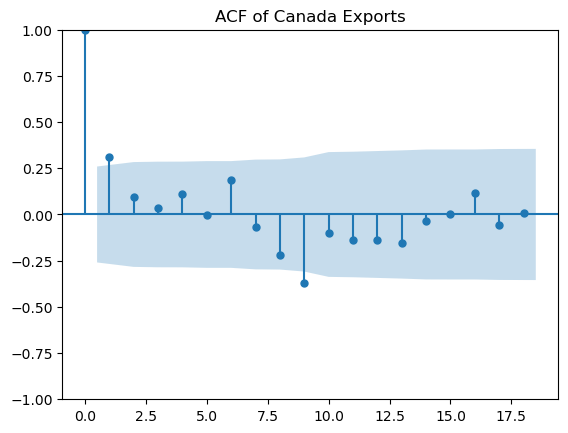

In [14]:
plot_acf(can_exports['Exports'].diff()[1:])
plt.title('ACF of Canada Exports')
plt.show()

#### PACF 시각화

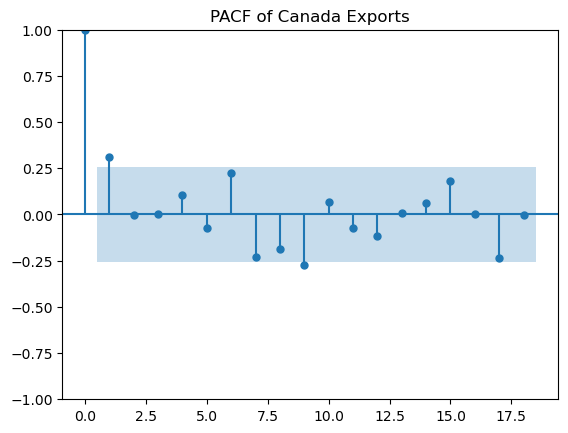

In [15]:
plot_pacf(can_exports['Exports'].diff()[1:])
plt.title('PACF of Canada Exports')
plt.show()

#### 최적의 ARIMA 모델 선택

In [16]:
auto_model = pm.auto_arima(can_exports['Exports'], start_p=0, d=1, start_q=0, seasonal=False, information_criterion="aicc", m=1)
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   58
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -105.638
Date:                Mon, 17 Feb 2025   AIC                            215.277
Time:                        17:23:26   BIC                            219.363
Sample:                    01-01-1960   HQIC                           216.865
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3213      0.102      3.145      0.002       0.121       0.522
sigma2         2.3793      0.303      7.853      0.000       1.786       2.973
Ljung-Box (L1) (Q):                   0.01   Jarque-

#### 잔차 확인

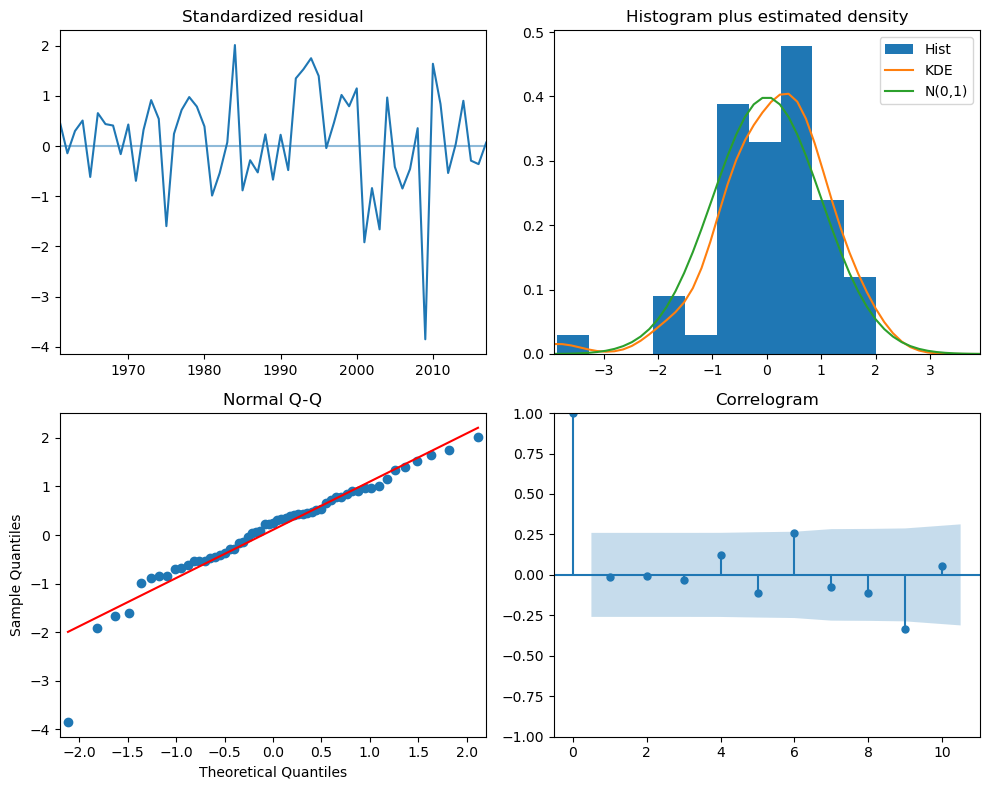

In [17]:
auto_model.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

## 예제 5-3. 계절성 ARIMA 모델링 예시

### 1) 미국 레저 산업 고용 데이터  SARIMA 모델 적합

#### 필요한 패키지 불러오기

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

#### 데이터 불러오기

In [19]:
us_emp = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.2/data/us_employment.csv")
us_emp['Month'] = pd.to_datetime(us_emp['Month'], format='%Y %m')
us_leis = us_emp[us_emp['Title'] == 'Leisure and Hospitality']
us_leis.index = us_leis['Month']
us_leis = us_leis.loc['2000/1/1':]
us_leis

,Month,Series_ID,Title,Employed
Month,,,,
2000-01-01,2000-01-01,CEU7000000001,Leisure and Hospitality,11056.0
2000-02-01,2000-02-01,CEU7000000001,Leisure and Hospitality,11180.0
2000-03-01,2000-03-01,CEU7000000001,Leisure and Hospitality,11435.0
2000-04-01,2000-04-01,CEU7000000001,Leisure and Hospitality,11740.0
2000-05-01,2000-05-01,CEU7000000001,Leisure and Hospitality,12060.0
...,...,...,...,...
2019-05-01,2019-05-01,CEU7000000001,Leisure and Hospitality,16961.0
2019-06-01,2019-06-01,CEU7000000001,Leisure and Hospitality,17403.0
2019-07-01,2019-07-01,CEU7000000001,Leisure and Hospitality,17463.0


#### 시각화

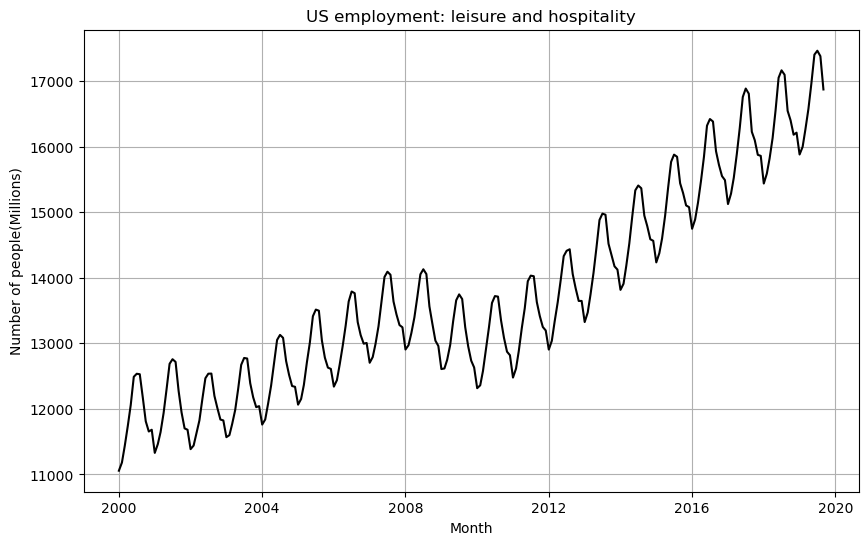

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(us_leis['Employed'], color='black')
plt.xlabel('Month')
plt.ylabel('Number of people(Millions)')
plt.title('US employment: leisure and hospitality')
plt.grid(True)
plt.show()

#### 차분 시각화

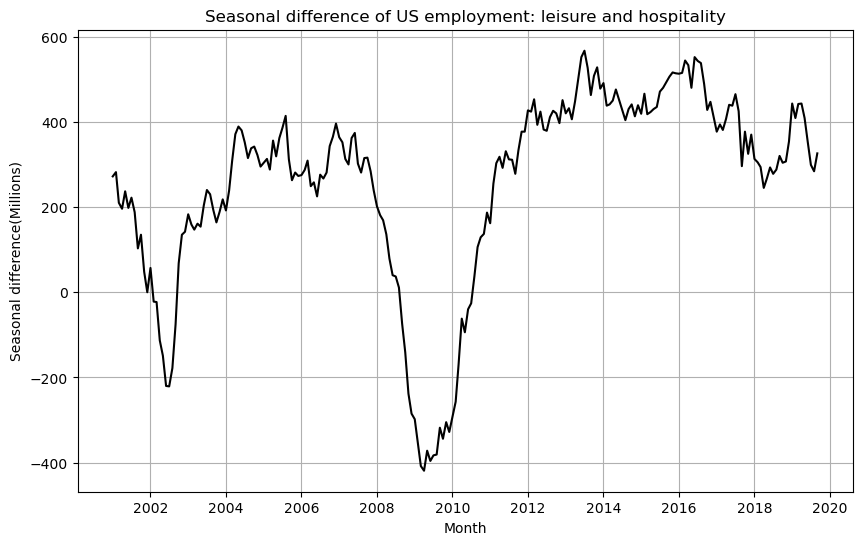

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(us_leis['Employed'].diff(12)[12:], color='black')
plt.xlabel('Month')
plt.ylabel('Seasonal difference(Millions)')
plt.title('Seasonal difference of US employment: leisure and hospitality')
plt.grid(True)
plt.show()

#### 2차 차분 및 시각화

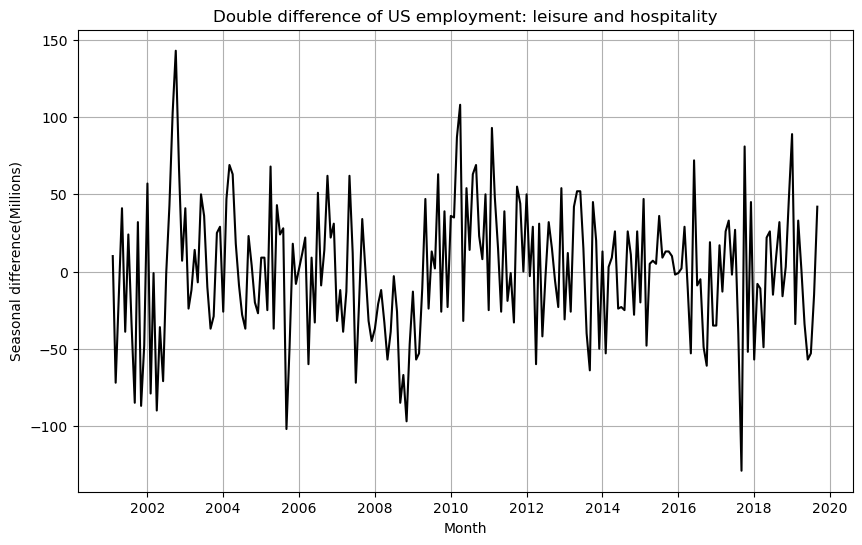

In [22]:
doubdiff_us_leis = us_leis['Employed'].diff(12)[12:].diff()[1:]

plt.figure(figsize=(10, 6))
plt.plot(doubdiff_us_leis, color='black')
plt.xlabel('Month')
plt.ylabel('Seasonal difference(Millions)')
plt.title('Double difference of US employment: leisure and hospitality')
plt.grid(True)
plt.show()

#### 2차 차분 ACF 시각화

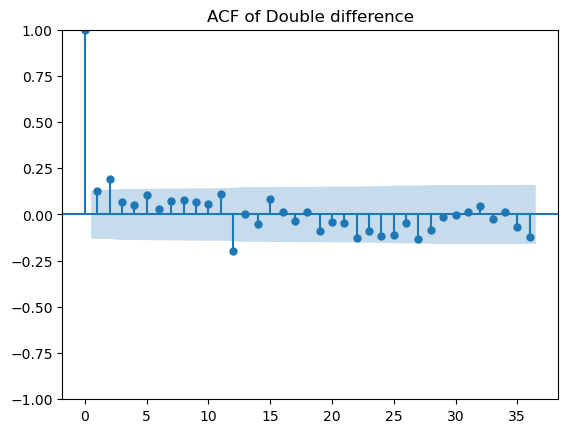

In [23]:
plot_acf(doubdiff_us_leis, lags=36)
plt.title("ACF of Double difference")
plt.show()

#### 2차 차분 PACF 시각화

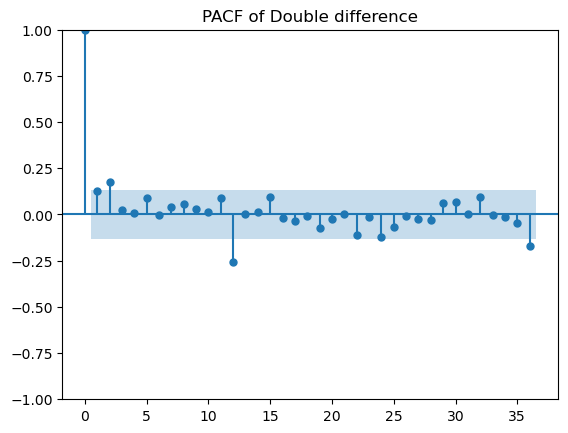

In [24]:
plot_pacf(doubdiff_us_leis, lags=36)
plt.title("PACF of Double difference")
plt.show()

#### ARIMA 모델 자동 선택

In [25]:
auto_model = pm.auto_arima(us_leis['Employed'], start_p=2, d=1, start_q=0, start_P=1, D=1, start_Q=1, information_criterion="aicc", m=12)
print(auto_model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  237
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1135.376
Date:                                 Mon, 17 Feb 2025   AIC                           2280.751
Time:                                         17:24:04   BIC                           2297.809
Sample:                                     01-01-2000   HQIC                          2287.637
                                          - 09-01-2019                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9055      0.070     12.988      0.000       0.769       1

#### ARIMA 모델 수동 선택 1안

In [26]:
model = ARIMA(us_leis['Employed'], order=(0,1,2), seasonal_order=(0,1,1,12))
fit = model.fit()
print(fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           Employed   No. Observations:                  237
Model:             ARIMA(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1141.102
Date:                            Mon, 17 Feb 2025   AIC                           2290.204
Time:                                    17:24:05   BIC                           2303.851
Sample:                                01-01-2000   HQIC                          2295.713
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1442      0.059      2.445      0.014       0.029       0.260
ma.L2          0.2017      0.069   

#### ARIMA 모델 수동 선택 2안

In [27]:
model = ARIMA(us_leis['Employed'], order=(2,1,0), seasonal_order=(0,1,1,12))
fit = model.fit()
print(fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           Employed   No. Observations:                  237
Model:             ARIMA(2, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -1140.082
Date:                            Mon, 17 Feb 2025   AIC                           2288.164
Time:                                    17:24:05   BIC                           2301.810
Sample:                                01-01-2000   HQIC                          2293.672
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1562      0.060      2.601      0.009       0.038       0.274
ar.L2          0.1985      0.068   

#### 자동 선택 모델 적합성 검증

                                       SARIMAX Results                                       
Dep. Variable:                              Employed   No. Observations:                  237
Model:             ARIMA(1, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1135.376
Date:                               Mon, 17 Feb 2025   AIC                           2280.751
Time:                                       17:24:07   BIC                           2297.809
Sample:                                   01-01-2000   HQIC                          2287.637
                                        - 09-01-2019                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9055      0.070     12.988      0.000       0.769       1.042
ma.L1      

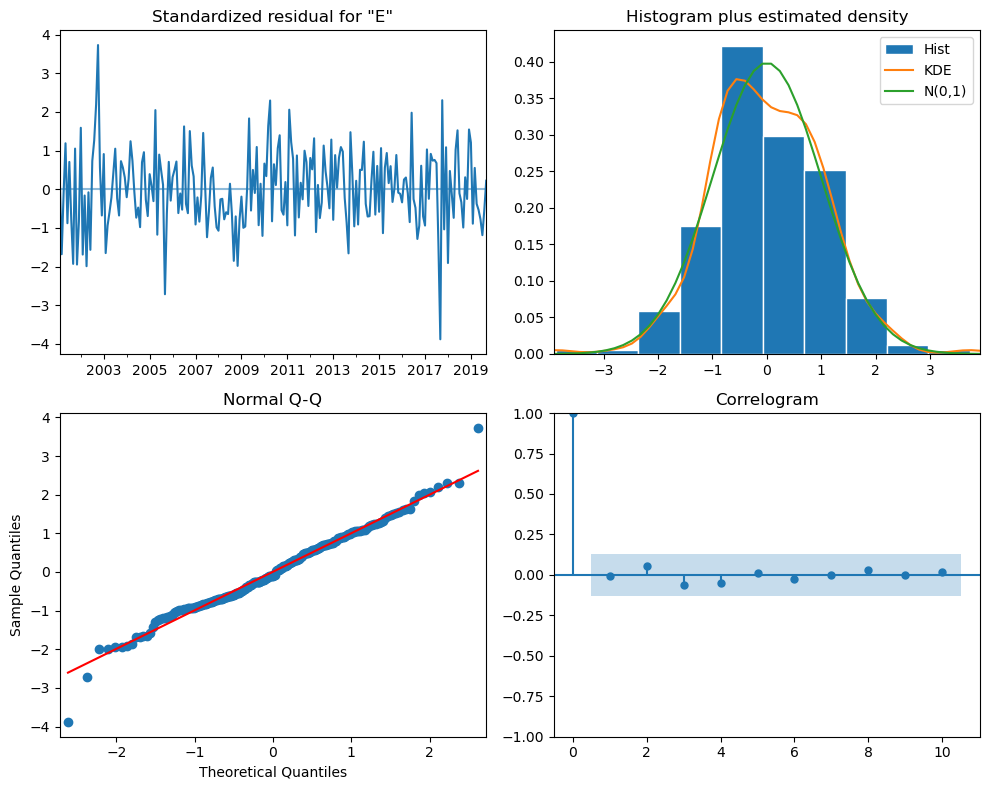

In [28]:
model = ARIMA(us_leis['Employed'], order=(1,1,1), seasonal_order=(0,1,2,12))
fit = model.fit()
print(fit.summary())

fit.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

#### SARIMA 예측값 구하기

In [29]:
forecast_result = fit.get_forecast(24)
forecast_mean = forecast_result.predicted_mean
lower_ci80 = forecast_result.conf_int(alpha=0.2).iloc[:,0]
upper_ci80 = forecast_result.conf_int(alpha=0.2).iloc[:,1]
lower_ci95 = forecast_result.conf_int(alpha=0.05).iloc[:,0]
upper_ci95 = forecast_result.conf_int(alpha=0.05).iloc[:,1]

#### 예측 시각화

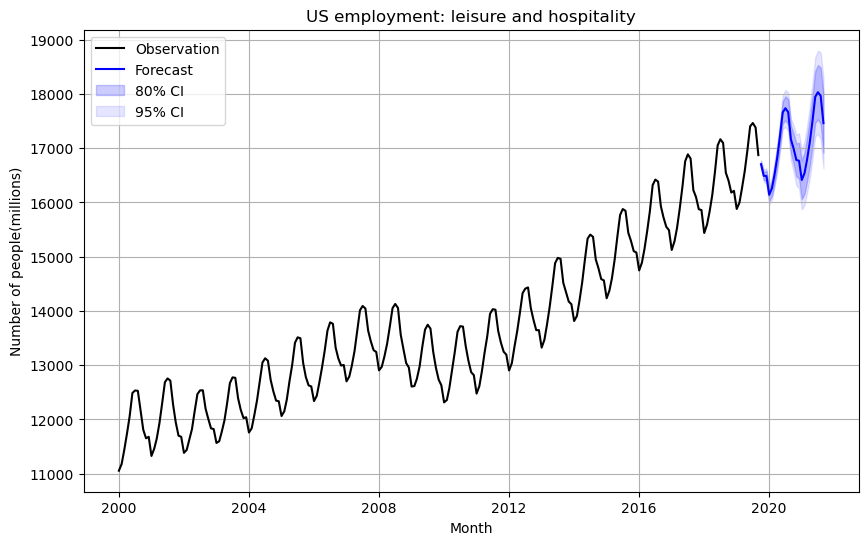

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(us_leis['Employed'], label='Observation', color='black')
plt.plot(forecast_mean, label='Forecast', color='b')
plt.fill_between(forecast_mean.index, lower_ci80, upper_ci80, label='80% CI', color='b', alpha=.2)
plt.fill_between(forecast_mean.index, lower_ci95, upper_ci95, label='95% CI', color='b', alpha=.1)
plt.xlabel('Month')
plt.ylabel('Number of people(millions)')
plt.title('US employment: leisure and hospitality')
plt.grid(True)
plt.legend()
plt.show()

### 2) 코르티코스테로이드 약물 판매량 데이터 SARIMA 모델 적합

#### 필요한 패키지 불러오기

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

#### 데이터 불러오기

In [32]:
h02 = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.2/data/h02.csv", index_col=0)
h02.index = pd.date_range(start='1/1/1992', periods=h02.shape[0], freq='1MS')

h02

,x
1992-01-01,0.429795
1992-02-01,0.400906
1992-03-01,0.432159
1992-04-01,0.492543
1992-05-01,0.502369
...,...
2008-08-01,0.761822
2008-09-01,0.649435
2008-10-01,0.827887
2008-11-01,0.816255


#### 로그화 함수 정의

In [33]:
def log_series(series):
    tmp = np.log(series)
    return pd.Series(tmp, series.index)

#### 원본, 로그화 데이터 시각화

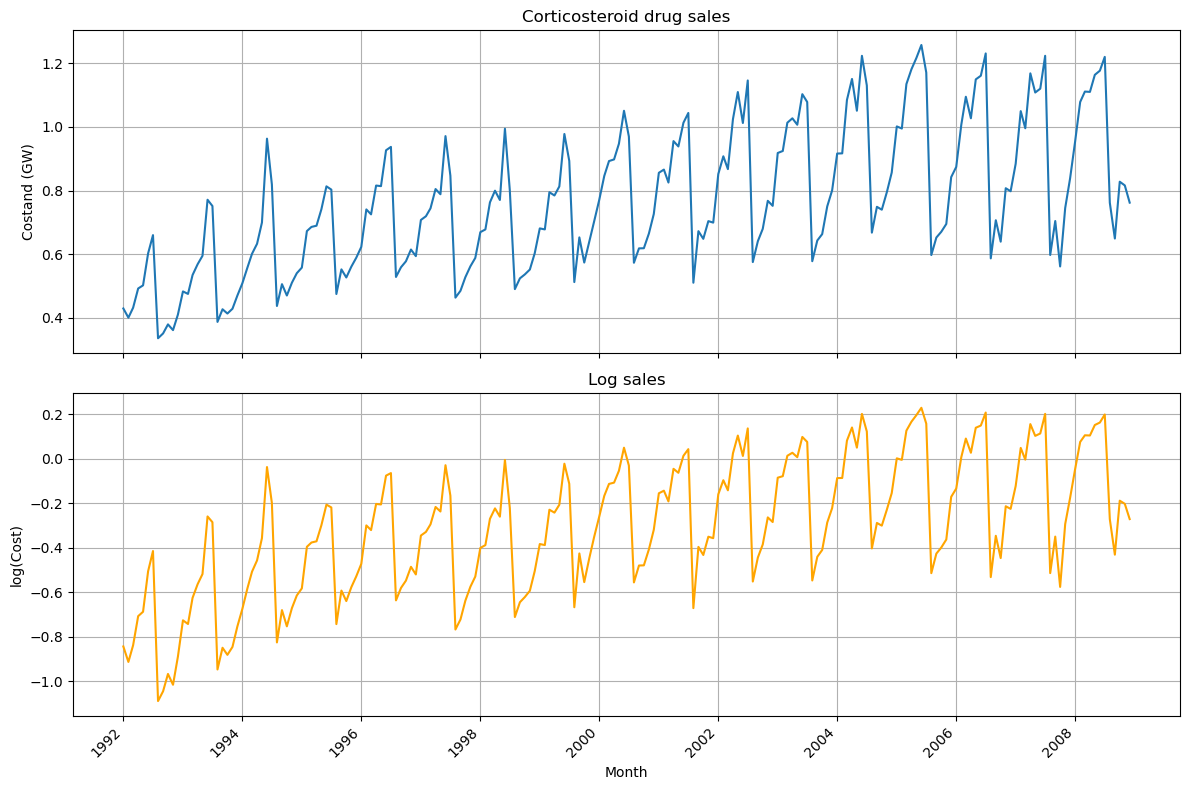

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax1.plot(h02.x)
ax1.set_ylabel('Costand (GW)')
ax1.set_title('Corticosteroid drug sales')
ax1.grid(True)

ax2.plot(log_series(h02.x), color='orange')
ax2.set_ylabel('log(Cost)')
ax2.set_title('Log sales')
ax2.grid(True)

ax2.set_xlabel('Month')

plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 계절 차분화 시각화

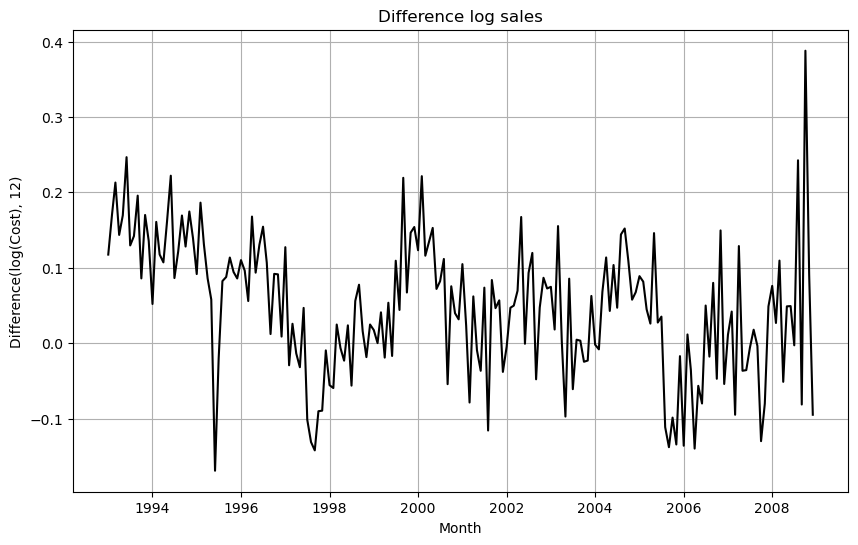

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(log_series(h02.x).diff(12)[12:], color='black')
plt.xlabel('Month')
plt.ylabel('Difference(log(Cost), 12)')
plt.title('Difference log sales')
plt.grid(True)
plt.show()

#### ACF 시각화

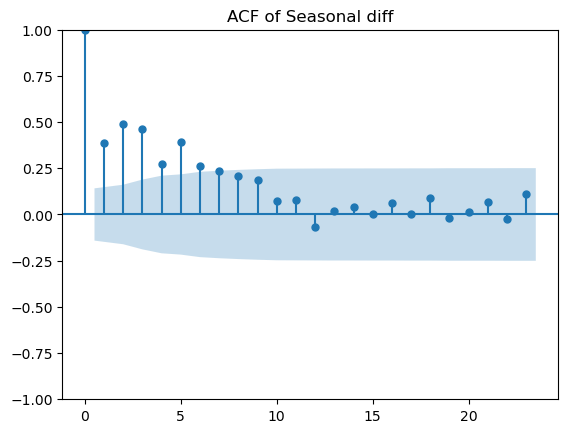

In [36]:
plot_acf(log_series(h02.x).diff(12)[12:])
plt.title("ACF of Seasonal diff")
plt.show()

#### PACF 시각화

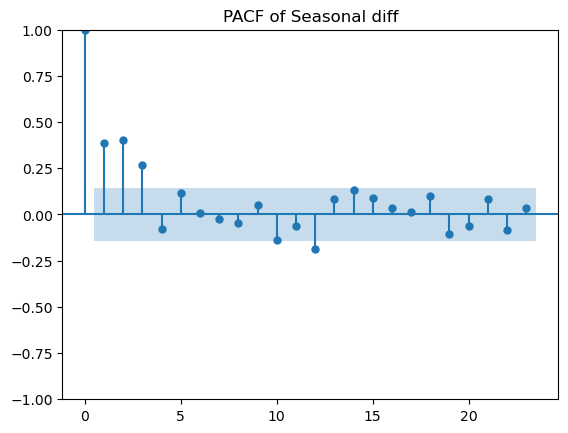

In [37]:
plot_pacf(log_series(h02.x).diff(12)[12:])
plt.title("PACF of Seasonal diff")
plt.show()

#### 모델 1안 적합

In [38]:
model = ARIMA(h02.x, order=(3,0,0), seasonal_order=(2,1,0,12))
fit = model.fit()
print(fit.summary())

                                    SARIMAX Results                                     
Dep. Variable:                                x   No. Observations:                  204
Model:             ARIMA(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 287.764
Date:                          Mon, 17 Feb 2025   AIC                           -563.527
Time:                                  17:24:13   BIC                           -543.982
Sample:                              01-01-1992   HQIC                          -555.611
                                   - 12-01-2008                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0986      0.068      1.451      0.147      -0.035       0.232
ar.L2          0.3980      0.053      7.560      0.

#### 모델 1안 잔차 확인

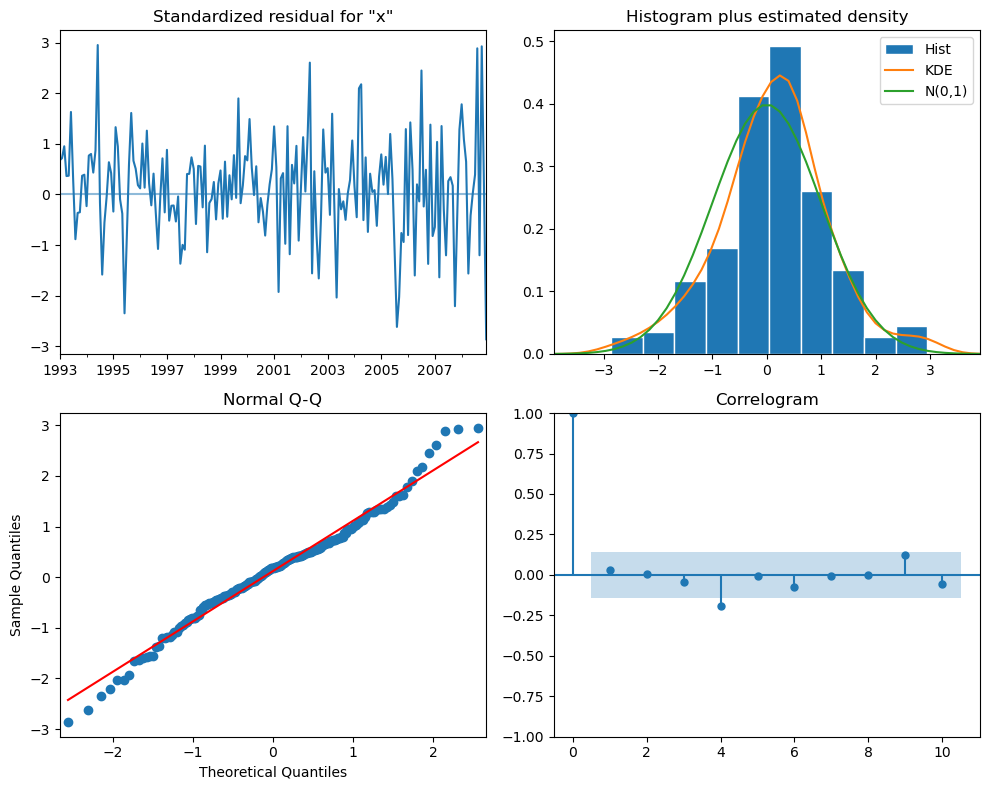

In [39]:
fit.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

#### 모델 2안 적합

In [40]:
model2 = ARIMA(h02.x, order=(2,1,0), seasonal_order=(0,1,1,12))
fit2 = model.fit()
print(fit2.summary())

                                    SARIMAX Results                                     
Dep. Variable:                                x   No. Observations:                  204
Model:             ARIMA(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 287.764
Date:                          Mon, 17 Feb 2025   AIC                           -563.527
Time:                                  17:24:17   BIC                           -543.982
Sample:                              01-01-1992   HQIC                          -555.611
                                   - 12-01-2008                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0986      0.068      1.451      0.147      -0.035       0.232
ar.L2          0.3980      0.053      7.560      0.

#### 모델 2안 잔차 확인

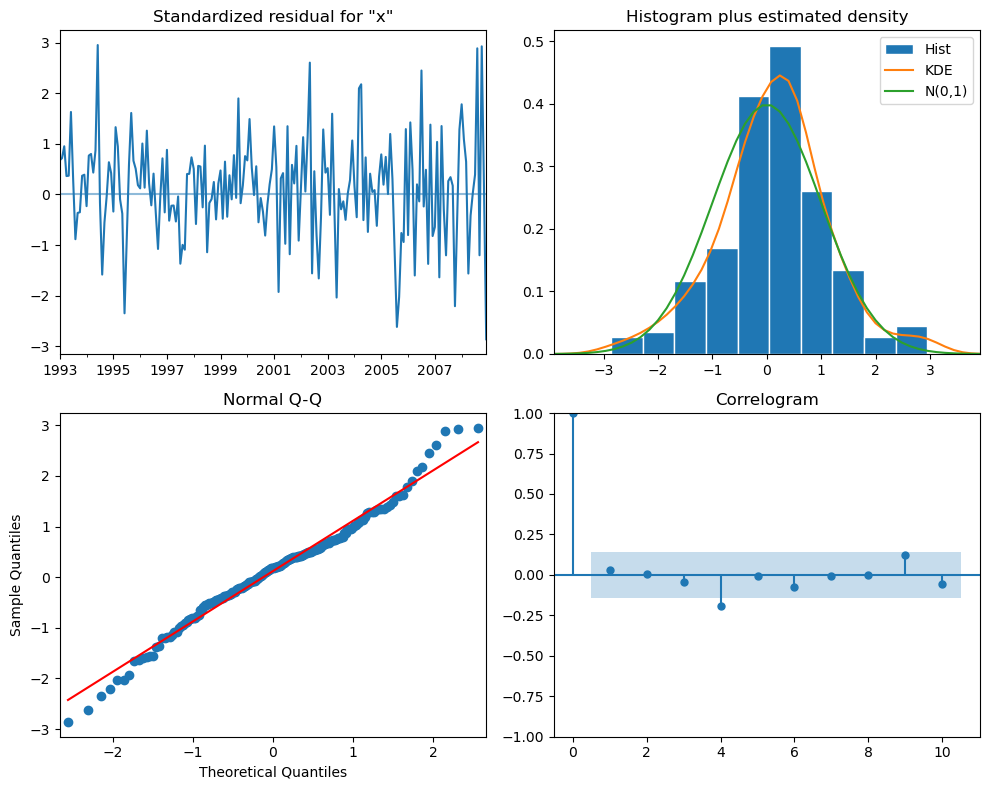

In [41]:
fit2.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

#### 모델 3안 적합

In [42]:
model3 = ARIMA(h02.x, order=(2,1,3), seasonal_order=(0,1,1,12))
fit3 = model3.fit()
print(fit3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  x   No. Observations:                  204
Model:             ARIMA(2, 1, 3)x(0, 1, [1], 12)   Log Likelihood                 286.313
Date:                            Mon, 17 Feb 2025   AIC                           -558.627
Time:                                    17:24:20   BIC                           -535.861
Sample:                                01-01-1992   HQIC                          -549.406
                                     - 12-01-2008                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2357      0.211     -5.858      0.000      -1.649      -0.822
ar.L2         -0.5701      0.223   

#### 모델 3안 잔차 확인

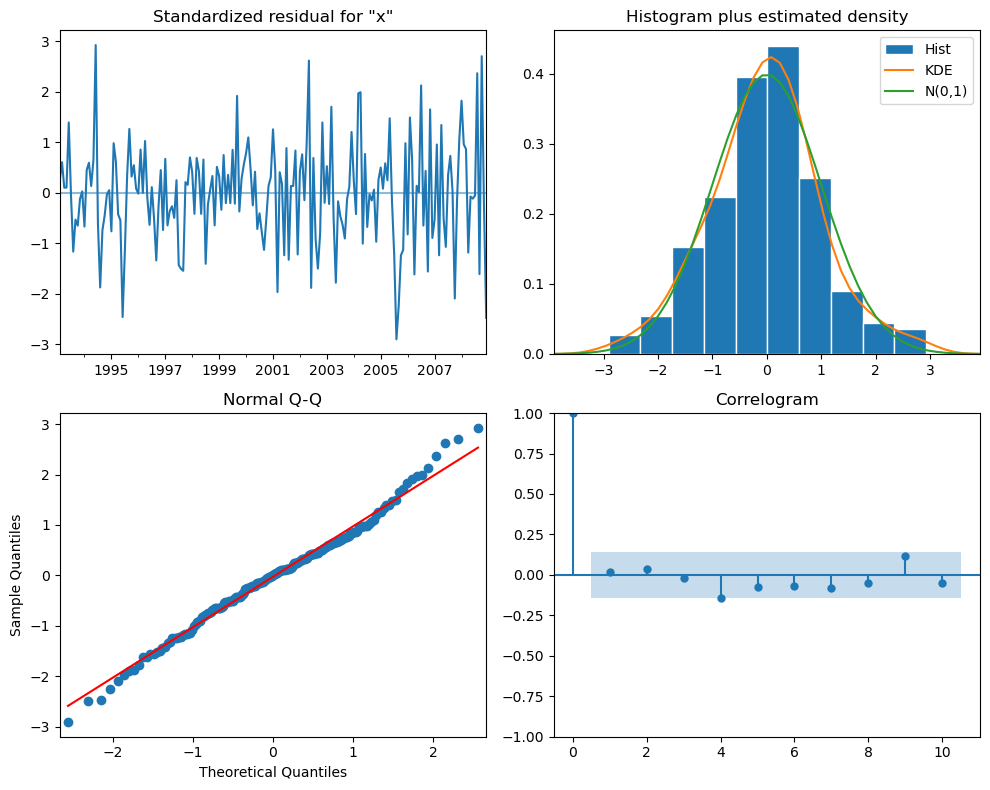

In [43]:
fit3.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

#### 모델 4안 적합

In [44]:
model4 = ARIMA(h02.x, order=(3,0,1), seasonal_order=(0,1,2,12))
fit4 = model4.fit()
print(fit4.summary())

                                       SARIMAX Results                                       
Dep. Variable:                                     x   No. Observations:                  204
Model:             ARIMA(3, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood                 289.608
Date:                               Mon, 17 Feb 2025   AIC                           -565.217
Time:                                       17:24:25   BIC                           -542.414
Sample:                                   01-01-1992   HQIC                          -555.981
                                        - 12-01-2008                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2435      0.150     -1.625      0.104      -0.537       0.050
ar.L2      

#### 모델 4안 잔차 확인

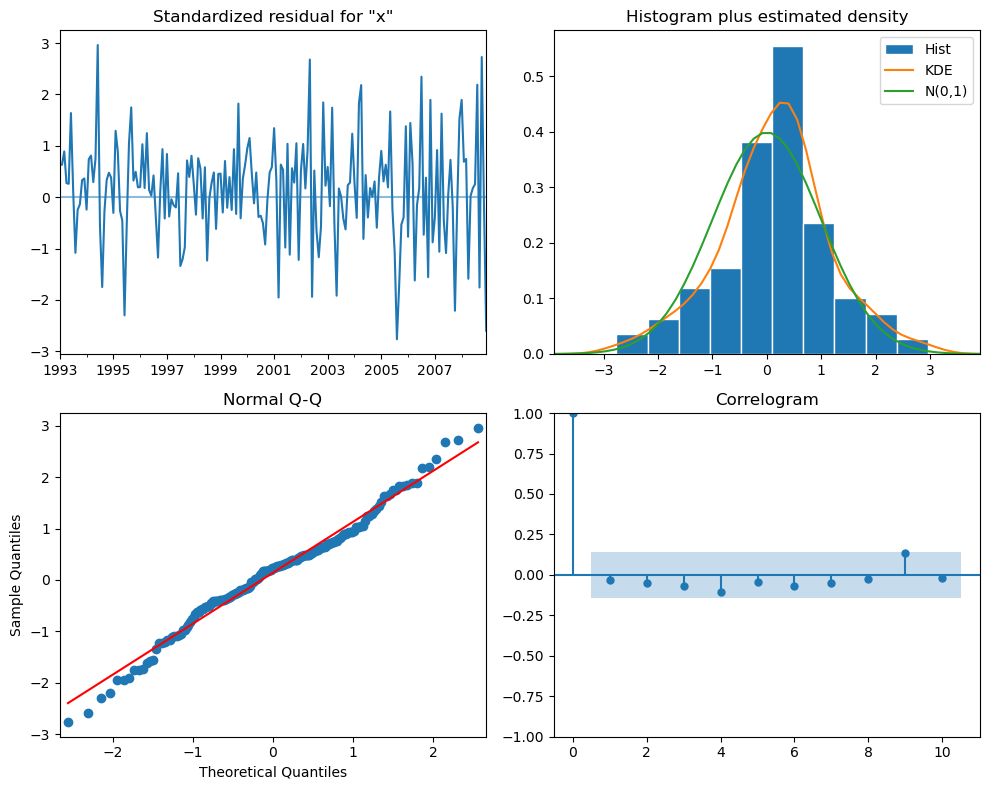

In [45]:
fit4.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

#### SARIMA 예측값 구하기

In [46]:
forecast_result = fit4.get_forecast(24)
forecast_mean = forecast_result.predicted_mean
lower_ci80 = forecast_result.conf_int(alpha=0.2).iloc[:,0]
upper_ci80 = forecast_result.conf_int(alpha=0.2).iloc[:,1]
lower_ci95 = forecast_result.conf_int(alpha=0.05).iloc[:,0]
upper_ci95 = forecast_result.conf_int(alpha=0.05).iloc[:,1]

#### 예측 시각화

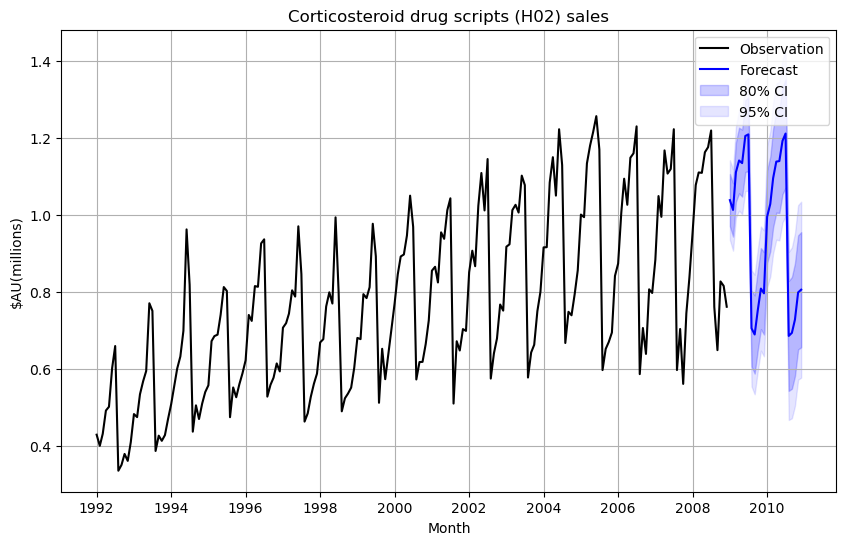

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(h02.x, label='Observation', color='black')
plt.plot(forecast_mean, label='Forecast', color='b')
plt.fill_between(forecast_mean.index, lower_ci80, upper_ci80, label='80% CI', color='b', alpha=.2)
plt.fill_between(forecast_mean.index, lower_ci95, upper_ci95, label='95% CI', color='b', alpha=.1)
plt.xlabel('Month')
plt.ylabel('$AU(millions)')
plt.title('Corticosteroid drug scripts (H02) sales')
plt.grid(True)
plt.legend()
plt.show()

## 예제 5-4. ARIMA 모델 예측 예시

### 노르웨이와 캐나다의 연간수출량 데이터 ARIMA 모델 예측

#### 필요한 패키지 불러오기

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#### 데이터 불러오기

In [49]:
global_economy = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.2/data/global_economy.csv')
global_economy['Year'] = pd.to_datetime(global_economy['Year'], format='%Y')
nor_exports = global_economy[global_economy['Code'] == 'NOR']
nor_exports.index = nor_exports['Year']
can_exports = global_economy[global_economy['Code'] == 'CAN']
can_exports.index = can_exports['Year']

#### 노르웨이 수출 데이터 모델 적합

In [50]:
nor_model = ARIMA(nor_exports['Exports'], order=(2,0,1))
nor_fit = nor_model.fit()

#### 캐나다 수출 데이터 모델 적합

In [51]:
can_model = ARIMA(can_exports['Exports'], order=(1,1,0))
can_fit = can_model.fit()

#### 노르웨이 수출 데이터 예측값 구하기

In [52]:
nor_forecast_result = nor_fit.get_forecast(5)
nor_forecast_mean = nor_forecast_result.predicted_mean
nor_lower_ci80 = nor_forecast_result.conf_int(alpha=0.2).iloc[:,0]
nor_upper_ci80 = nor_forecast_result.conf_int(alpha=0.2).iloc[:,1]
nor_lower_ci95 = nor_forecast_result.conf_int(alpha=0.05).iloc[:,0]
nor_upper_ci95 = nor_forecast_result.conf_int(alpha=0.05).iloc[:,1]

#### 노르웨이 수출 데이터 예측 시각화

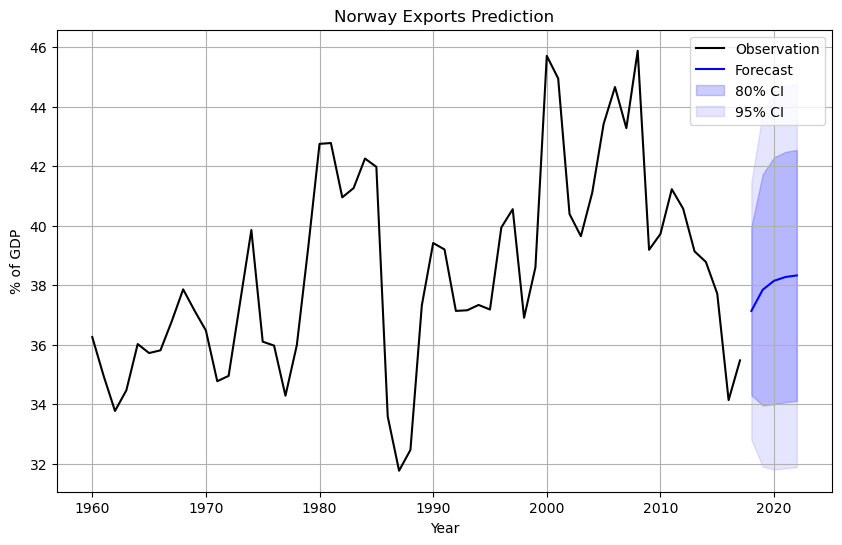

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(nor_exports['Exports'], label='Observation', color='black')
plt.plot(nor_forecast_mean, label='Forecast', color='b')
plt.fill_between(nor_forecast_mean.index, nor_lower_ci80, nor_upper_ci80, label='80% CI', color='b', alpha=.2)
plt.fill_between(nor_forecast_mean.index, nor_lower_ci95, nor_upper_ci95, label='95% CI', color='b', alpha=.1)
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Norway Exports Prediction')
plt.grid(True)
plt.legend()
plt.show()

#### 캐나다 수출 데이터 예측값 구하기

In [54]:
can_forecast_result = can_fit.get_forecast(10)
can_forecast_mean = can_forecast_result.predicted_mean
can_lower_ci80 = can_forecast_result.conf_int(alpha=0.2).iloc[:,0]
can_upper_ci80 = can_forecast_result.conf_int(alpha=0.2).iloc[:,1]
can_lower_ci95 = can_forecast_result.conf_int(alpha=0.05).iloc[:,0]
can_upper_ci95 = can_forecast_result.conf_int(alpha=0.05).iloc[:,1]

#### 캐나다 수출 데이터 예측 시각화

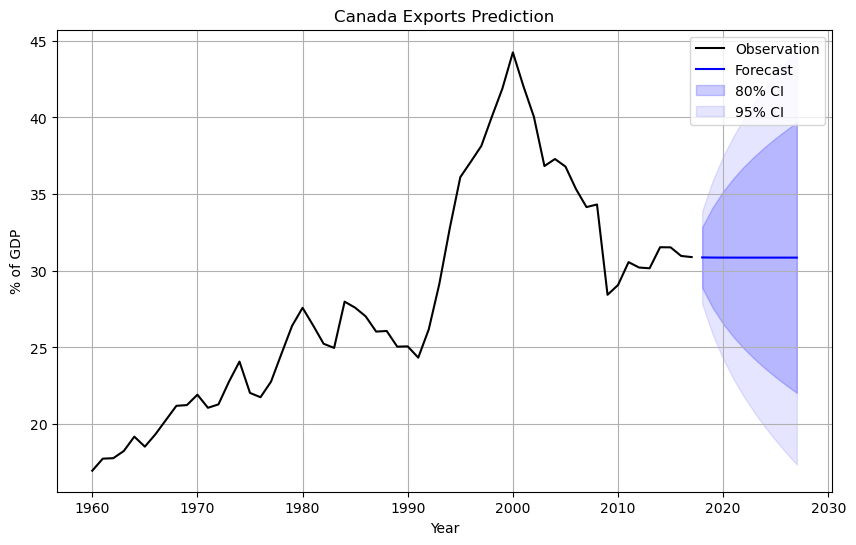

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(can_exports['Exports'], label='Observation', color='black')
plt.plot(can_forecast_mean, label='Forecast', color='b')
plt.fill_between(can_forecast_mean.index, can_lower_ci80, can_upper_ci80, label='80% CI', color='b', alpha=.2)
plt.fill_between(can_forecast_mean.index, can_lower_ci95, can_upper_ci95, label='95% CI', color='b', alpha=.1)
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Canada Exports Prediction')
plt.grid(True)
plt.legend()
plt.show()